In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

from IPython.display import display, HTML

In [3]:
CLUSTER_DICT = {
    'uraian_jenis_perusahaan': 'Uraian Jenis Perusahaan',
    'uraian_risiko_proyek' : 'Uraian Risiko Proyek',
    'skala_usaha': 'Skala Usaha',
    'golongan_kbli': 'Golongan KBLI',
}

In [4]:
TARGET_COLUMN = 'golongan_kbli'

In [5]:
df = pd.read_csv('transform_datasets/transform_df_'+ TARGET_COLUMN +'.csv')
df.set_index('kecamatan', inplace=True)

In [6]:
df

,47,45,46,10,11,41,42,12,14,43,56
kecamatan,,,,,,,,,,,
Amurang,81,16,90,11,20,48,61,7,24,64,20
Amurang Barat,36,4,39,17,8,36,33,4,6,29,17
Suluun Tareran,27,2,3,5,2,0,2,2,7,0,5
Tumpaan,42,4,54,18,15,19,19,9,12,16,14
Amurang Timur,41,2,42,11,6,31,51,6,12,46,14
Tenga,19,5,3,6,5,6,9,4,4,2,12
Maesaan,15,1,1,3,3,10,15,2,1,7,1
Motoling,28,4,2,9,12,0,1,5,8,2,6
Motoling Timur,29,5,9,3,0,9,8,6,4,16,4


## Menentukan Jumlah Cluster

### Elbow Method

In [7]:
def visualizeElbow(df, KmeansModel):
    visualizer = KElbowVisualizer(KmeansModel, k=(2,10))
    visualizer.fit(df)
    visualizer.show()

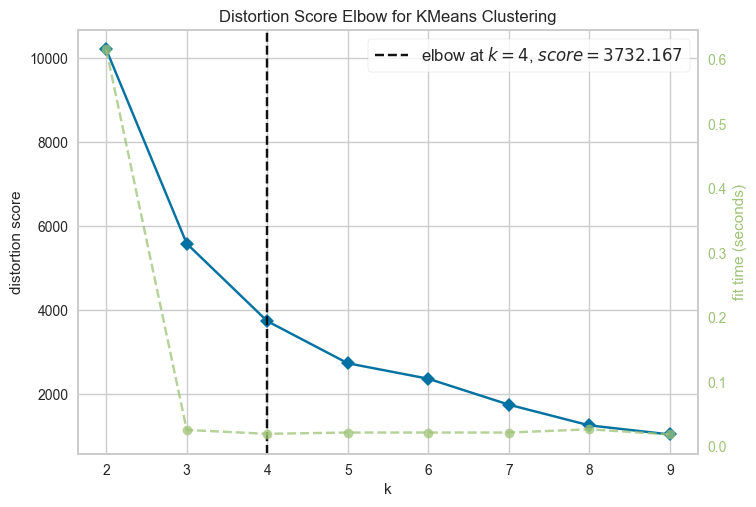

In [8]:
model = KMeans(
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)

visualizeElbow(df, model)

### Silhouette Method

In [9]:
def visualizeSilhouette(df, KmeansModel):
    visualizer = SilhouetteVisualizer(KmeansModel, colors='yellowbrick')
    visualizer.fit(df)
    visualizer.show()

In [20]:
for n_cluster in range(2,7):
    model = KMeans(
        init="random",
        n_clusters=n_cluster,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    visualizeSilhouette(df, model)

ValueError: could not convert string to float: 'C3'

# Kmeans Clustering

In [11]:
NUMBER_OF_CLUSTER = 5

In [12]:
kmeans = KMeans(
    init="random",
    n_clusters=NUMBER_OF_CLUSTER,
    n_init=10,
    max_iter=300,
    random_state=42
)
clusters_label = kmeans.fit_predict(df)

In [13]:
clusters_label

array([3, 4, 1, 0, 4, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
clusters_label_mapped = list(map(lambda x: 'C' + str(x), clusters_label))

In [15]:
df['cluster'] = clusters_label_mapped

In [16]:
df

,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Amurang,81,16,90,11,20,48,61,7,24,64,20,C3
Amurang Barat,36,4,39,17,8,36,33,4,6,29,17,C4
Suluun Tareran,27,2,3,5,2,0,2,2,7,0,5,C1
Tumpaan,42,4,54,18,15,19,19,9,12,16,14,C0
Amurang Timur,41,2,42,11,6,31,51,6,12,46,14,C4
Tenga,19,5,3,6,5,6,9,4,4,2,12,C1
Maesaan,15,1,1,3,3,10,15,2,1,7,1,C1
Motoling,28,4,2,9,12,0,1,5,8,2,6,C1
Motoling Timur,29,5,9,3,0,9,8,6,4,16,4,C1


# Deskripsi Cluster

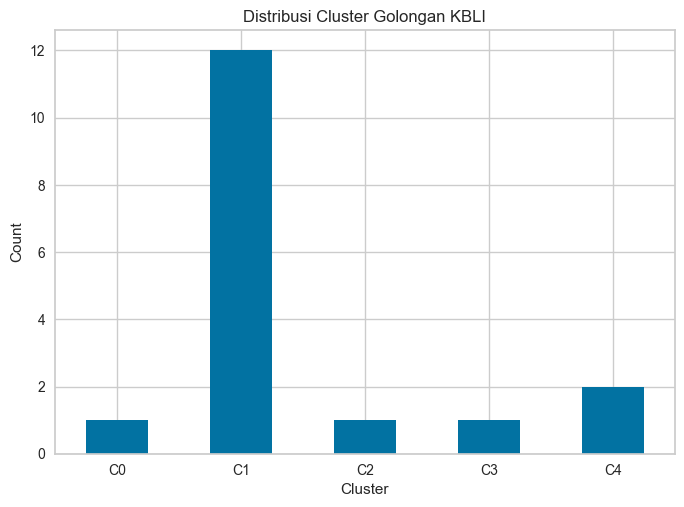

In [17]:
df['cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Cluster', rotation=0)
plt.ylabel('Count')
plt.title('Distribusi Cluster ' + CLUSTER_DICT[TARGET_COLUMN])
plt.show()

In [18]:
for cluster in df.cluster.unique():
    print("\nData ", CLUSTER_DICT[TARGET_COLUMN], "cluster: ", cluster)
    display_df = df.loc[df.cluster == cluster]
    display(HTML(display_df.to_html()))
    print('Deskripsi cluster')
    display(HTML(display_df.describe().to_html()))
    
    
    
    
    print('\n\n\n\n----------------------------------------------------------------------')


Data  Golongan KBLI cluster:  C3


,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Amurang,81,16,90,11,20,48,61,7,24,64,20,C3


Deskripsi cluster


,47,45,46,10,11,41,42,12,14,43,56
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0
25%,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0
50%,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0
75%,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0
max,81.0,16.0,90.0,11.0,20.0,48.0,61.0,7.0,24.0,64.0,20.0






----------------------------------------------------------------------

Data  Golongan KBLI cluster:  C4


,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Amurang Barat,36,4,39,17,8,36,33,4,6,29,17,C4
Amurang Timur,41,2,42,11,6,31,51,6,12,46,14,C4


Deskripsi cluster


,47,45,46,10,11,41,42,12,14,43,56
count,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
mean,38.500000,3.000000,40.50000,14.000000,7.000000,33.500000,42.000000,5.000000,9.000000,37.500000,15.50000
std,3.535534,1.414214,2.12132,4.242641,1.414214,3.535534,12.727922,1.414214,4.242641,12.020815,2.12132
min,36.000000,2.000000,39.00000,11.000000,6.000000,31.000000,33.000000,4.000000,6.000000,29.000000,14.00000
25%,37.250000,2.500000,39.75000,12.500000,6.500000,32.250000,37.500000,4.500000,7.500000,33.250000,14.75000
50%,38.500000,3.000000,40.50000,14.000000,7.000000,33.500000,42.000000,5.000000,9.000000,37.500000,15.50000
75%,39.750000,3.500000,41.25000,15.500000,7.500000,34.750000,46.500000,5.500000,10.500000,41.750000,16.25000
max,41.000000,4.000000,42.00000,17.000000,8.000000,36.000000,51.000000,6.000000,12.000000,46.000000,17.00000






----------------------------------------------------------------------

Data  Golongan KBLI cluster:  C1


,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Suluun Tareran,27,2,3,5,2,0,2,2,7,0,5,C1
Tenga,19,5,3,6,5,6,9,4,4,2,12,C1
Maesaan,15,1,1,3,3,10,15,2,1,7,1,C1
Motoling,28,4,2,9,12,0,1,5,8,2,6,C1
Motoling Timur,29,5,9,3,0,9,8,6,4,16,4,C1
Tompaso Baru,20,0,8,3,2,15,18,1,2,8,7,C1
Ranoyapo,10,2,2,5,3,0,5,1,1,0,2,C1
Tareran,27,4,3,11,3,10,20,6,7,5,9,C1
Motoling Barat,15,2,0,4,5,0,1,1,3,0,2,C1


Deskripsi cluster


,47,45,46,10,11,41,42,12,14,43,56
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000
mean,20.083333,2.500000,4.916667,5.750000,4.416667,5.000000,8.00000,2.916667,4.333333,4.500000,5.250000
std,7.427937,1.678744,4.399552,2.895922,3.423404,5.116817,6.78233,1.928652,2.640018,4.795832,3.165869
min,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000
25%,15.000000,1.000000,2.000000,3.000000,2.750000,0.000000,1.75000,1.000000,2.000000,1.500000,2.750000
50%,20.500000,2.000000,3.000000,5.000000,3.000000,4.500000,7.50000,2.500000,4.000000,2.500000,5.500000
75%,27.000000,4.000000,8.250000,7.500000,5.000000,9.250000,11.25000,4.250000,7.000000,7.250000,6.250000
max,29.000000,5.000000,13.000000,11.000000,12.000000,15.000000,20.00000,6.000000,8.000000,16.000000,12.000000






----------------------------------------------------------------------

Data  Golongan KBLI cluster:  C0


,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Tumpaan,42,4,54,18,15,19,19,9,12,16,14,C0


Deskripsi cluster


,47,45,46,10,11,41,42,12,14,43,56
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0
25%,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0
50%,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0
75%,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0
max,42.0,4.0,54.0,18.0,15.0,19.0,19.0,9.0,12.0,16.0,14.0






----------------------------------------------------------------------

Data  Golongan KBLI cluster:  C2


,47,45,46,10,11,41,42,12,14,43,56,cluster
kecamatan,,,,,,,,,,,,
Modoinding,50,2,30,16,14,8,6,0,1,4,7,C2


Deskripsi cluster


,47,45,46,10,11,41,42,12,14,43,56
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0
25%,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0
50%,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0
75%,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0
max,50.0,2.0,30.0,16.0,14.0,8.0,6.0,0.0,1.0,4.0,7.0






----------------------------------------------------------------------


### Simpan Hasil Cluster